In [22]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
X = np.eye(8)
#Each row is a learning example

Y = X
print(Y)

# We need to have 8 inputs (each number in a row of the matrix), a hidden layer with 3 nodes + bias and an output layer with 8 nodes

n_input = 8 # We need to have 8 inputs (each number in a row of the matrix)
n_hidden = 3
n_output = 8

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [24]:
epsilon = 0.1

#Weights
np.random.seed(42)

w1 = np.random.normal(0, epsilon, (n_input, n_hidden)) # 8 x 3 Weights for input to hidden
print(w1)
w2 = np.random.normal(0, epsilon, (n_hidden, n_output)) # 3 x 8 Weights for hidden to output
#print(w2)

#Biases
b1 = np.random.normal(0, epsilon, n_hidden) # Bias for hidden layer (3)
b2 = np.random.normal(0, epsilon, n_output) # Bias for output layer (8)




[[ 0.04967142 -0.01382643  0.06476885]
 [ 0.15230299 -0.02341534 -0.0234137 ]
 [ 0.15792128  0.07674347 -0.04694744]
 [ 0.054256   -0.04634177 -0.04657298]
 [ 0.02419623 -0.19132802 -0.17249178]
 [-0.05622875 -0.10128311  0.03142473]
 [-0.09080241 -0.14123037  0.14656488]
 [-0.02257763  0.00675282 -0.14247482]]


In [25]:
#Activation function, our single neuron corresponds exactly to the input-output mapping defined by logistic regression.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Used to compute the weighted input for a layer, which then is put into the activation function
def weighted_input(X, W, b):
    return np.dot(X, W) + b

#One-half squared-error cost function
def mse(Y, second_layer_output):
    return np.mean(0.5 * (Y - second_layer_output) ** 2)

In [26]:

#Could also have used a*(1-a) if we don't want to calculate z serperatly
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

#Element-wise multiplication
def delta_output(Y, a, z):
    return (a-Y)*sigmoid_derivative(z)

#In order to do the matrix multiplication, we use this order because each row is a learning example
def delta_hidden(W, next_delta, z):
    return np.dot(next_delta, np.transpose(W))*sigmoid_derivative(z)

#In order to do the matrix multiplication, again we use this order because each row is a learning example
def gradient_weight(next_delta, a):
    return np.dot(np.transpose(a), next_delta)
    
#Sum over rows (axis=0), as again each row is a learning example
def gradient_bias(next_delta):
    return np.sum(next_delta, axis=0)


In [27]:

alpha = 0.9

converged = False
i = 0

#For plotting
it_plot = []
loss_plot = []

while(converged is False):
    
    #Input layer
    a1 = X

    #Hidden layer
    z2 = weighted_input(X, w1, b1)
    a2 = sigmoid(z2)
    
    #Output layer
    z3 = weighted_input(a2, w2, b2)
    a3 = sigmoid(z3)

    #Output layer
    delta3 = delta_output(Y, a3, z3)

    #Hidden layer
    delta2 = delta_hidden(w2, delta3, z2)
    
    #Gradient for weight is same shape as W1/W2 (8x3/3x8)
    #Gradient for bias is same shape as b1/b2 (1x3/1x8)
    Delta_w2 = gradient_weight(delta3, a2)
    Delta_b2 = gradient_bias(delta3)

    Delta_w1 = gradient_weight(delta2, X)
    Delta_b1 = gradient_bias(delta2)

    #Update weights, devide by amount of learning examples
    w1 += -alpha*(Delta_w1/8)
    w2 += -alpha*(Delta_w2/8)

    #Update bias
    b1 += -alpha*(Delta_b1/8)
    b2 += -alpha*(Delta_b2/8)
    
    #Keep track for plot
    loss_plot.append(mse(Y,a3))
    it_plot.append(i)
    i+=1
    
    if i % 1000 == 0:
            print("MSE after iteration", i, ":", mse(Y, a3))
             
            # print(w1)
            # print(w2)
            
            print(a3)
            
    if mse(Y,a3) < 0.01:
        converged = True
        print("MSE after iteration", i, ":", mse(Y, a3))
             
        # print(w1)
        # print(w2)
            
        print(a3)
        
    

        break
            
          
           

MSE after iteration 1000 : 0.04382282694099751
[[0.18298941 0.10877426 0.19410363 0.09945698 0.08321991 0.12307202
  0.18991361 0.11261959]
 [0.11879194 0.14932587 0.11057852 0.14506819 0.13888664 0.14556118
  0.12306423 0.12365216]
 [0.17682926 0.10297143 0.38338998 0.10452331 0.21941584 0.08731087
  0.08689692 0.15848052]
 [0.11854149 0.16097741 0.11747017 0.1659736  0.18311215 0.15980686
  0.12959304 0.13487976]
 [0.10871385 0.1616814  0.22863407 0.18534173 0.41813031 0.123165
  0.05882865 0.18756333]
 [0.14228309 0.15562224 0.09550433 0.15507364 0.1083456  0.1908389
  0.23581706 0.11430614]
 [0.22187391 0.14078407 0.11243147 0.14262042 0.06331696 0.24675298
  0.52792751 0.10052228]
 [0.12565045 0.1297784  0.18666699 0.12649868 0.18113982 0.10845377
  0.0799118  0.1393507 ]]
MSE after iteration 2000 : 0.020078755762716505
[[6.93675956e-01 7.60141207e-02 1.45349470e-01 5.25686220e-03
  8.56066467e-04 1.42925784e-02 1.25269886e-01 1.42560504e-01]
 [6.42168294e-02 2.96602741e-01 2.2965

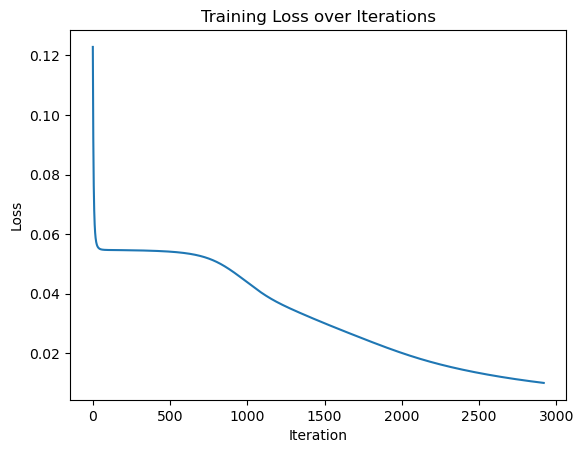

In [28]:
plt.plot(it_plot, loss_plot)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Training Loss over Iterations")
plt.show()